This is case study for fast food. 

There are following steps for market segmentation analysis:
    Step1. Deciding (not) to segment
    
    Step2. Specifying the Ideal Target Segmentation
    
    Step3. Collecting Data
    
    Step4. Exploring Data
    
    Step5. Extracting Segments
    
    Step6. Profiling Segments
    
    Step7. Describing Segments
    
    Step8. Selecting the target Segments
    
    Step9. Customising the marketing mix
    
    Step10. Evaluation and monitoring
    
Here, the first three steps are theroitical which are provided in the report pdf.We will code from Step 4.

Step4.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
#Step 2: Loading and Exploring the Dataset

# Load the dataset
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
mcdonalds = pd.read_csv(url)

# Explore the dataset
print(mcdonalds.head())
print(mcdonalds.info())
print(mcdonalds.describe())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
segment_vars = mcdonalds.columns[:11]
mcdonalds[segment_vars] = mcdonalds[segment_vars].apply(lambda col: label_encoder.fit_transform(col))

In [4]:
print(mcdonalds.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age      VisitFrequency  Gender  
0        0           0   -3   61  Every three months  Female  
1        0           0   +2   51  Every three months  Female  
2        1           0   +1   62  Every three months  Female  
3        0           1   +4   69         Once a week  Female  
4        1           0   +2   49        Once a month    Male  


In [5]:
avg_values = np.round(mcdonalds[segment_vars].mean(), 2)
print(avg_values)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
# Principal Components Analysis (PCA)
MD_x = mcdonalds[segment_vars].values
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [7]:
# PCA Results
print("Explained variance ratio:")
print(np.round(MD_pca.explained_variance_ratio_, 4))
print("Cumulative explained variance:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4))


Explained variance ratio:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative explained variance:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [8]:
# Factor Loadings
print("Factor Loadings:")
print(pd.DataFrame(MD_pca.components_, columns=segment_vars))

Factor Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensive   healthy 

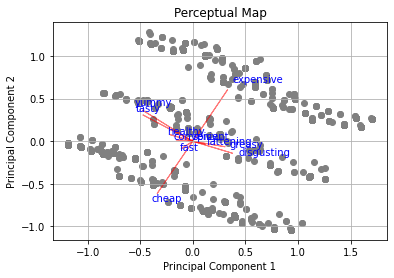

In [9]:
# Perceptual Map using PCA
projected_data = MD_pca.transform(MD_x)
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
for i, var in enumerate(segment_vars):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='red', alpha=0.5)
    plt.text(MD_pca.components_[0, i] * 1.15, MD_pca.components_[1, i] * 1.15, var, color='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map")
plt.grid(True)
plt.show()


Step5 : Extracting Segments

In [10]:


from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
# Map "Like" column to numeric values
like_mapping = {
    'I love it!+5': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I hate it!-5': -5
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

In [12]:
X = mcdonalds.iloc[:, 1:11]

X['Like.n'] = mcdonalds['Like.n']


X

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like.n
0,1,0,1,0,1,1,0,1,0,0,-3
1,1,0,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,0,1,1,1,0,1
3,1,0,1,1,1,1,1,0,0,1,4
4,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,1,0,1,-5
1449,1,0,1,0,0,1,1,0,1,0,2
1450,1,0,1,0,1,0,1,1,0,0,3
1451,1,0,0,0,1,1,1,0,1,0,4


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
num_clusters_range = range(2, 9)
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

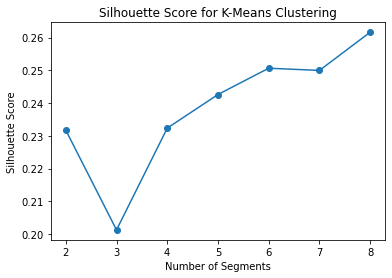

(1453, 11)

In [15]:
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering")
plt.show()
X_scaled.shape

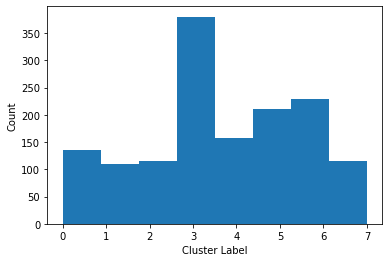

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(1234)



# Initialize the KMeans object
kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234)

# Perform clustering
kmeans.fit(X_scaled)

# Get the cluster labels
data_predict = kmeans.labels_

# Relabel the clusters if needed
# In scikit-learn, the cluster labels are assigned from 0 to (n_clusters-1) by default,
# so you might not need to relabel them as in R.

# Now you can plot the histogram of cluster labels as before
import matplotlib.pyplot as plt

plt.figure()
plt.hist(data_predict, bins=8)  # You can change 'bins' according to your preference
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()





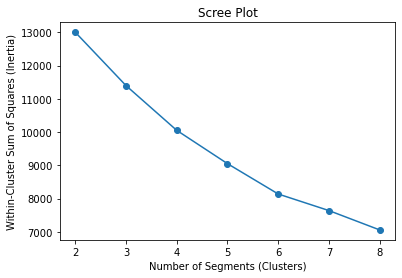

In [17]:
inertia_values = []
num_clusters = range(2, 9)  # Range of clusters (2 to 8) as in the original R code

# Calculate inertia for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Create the scree plot
plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Scree Plot')
plt.show()

In [18]:
from sklearn.utils import resample
cluster_results = []


# Number of bootstrap iterations
n_bootstrap = 100

# Range of clusters (2 to 8) as in the original R code
num_clusters_range = range(2, 9)

# Bootstrap loop
for i in range(n_bootstrap):
    # Perform bootstrap resampling
    mcdonalds.x_bootstrapped = resample(X_scaled, random_state=i, replace=True)

    # Standardize the bootstrapped data
    scaler = StandardScaler()
    mcdonalds.x_bootstrapped_standardized = scaler.fit_transform(mcdonalds.x_bootstrapped)

    # Initialize a dictionary to store clustering results for this bootstrap iteration
    bootstrap_results = {}

    # Perform clustering for each number of clusters
    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=i)
        kmeans.fit(mcdonalds.x_bootstrapped_standardized)
        bootstrap_results[k] = kmeans.labels_

    # Store the clustering results for this bootstrap iteration
    cluster_results.append(bootstrap_results)
print("Cluster labels for the first bootstrap iteration:")
print(cluster_results[0])

C:\Users\prabh\AppData\Local\Temp\ipykernel_135212\2116898495.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mcdonalds.x_bootstrapped = resample(X_scaled, random_state=i, replace=True)
C:\Users\prabh\AppData\Local\Temp\ipykernel_135212\2116898495.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mcdonalds.x_bootstrapped_standardized = scaler.fit_transform(mcdonalds.x_bootstrapped)


Cluster labels for the first bootstrap iteration:
{2: array([0, 0, 0, ..., 0, 1, 0]), 3: array([0, 0, 1, ..., 0, 2, 0]), 4: array([1, 1, 3, ..., 1, 2, 1]), 5: array([4, 4, 4, ..., 4, 2, 4]), 6: array([1, 4, 4, ..., 1, 1, 4]), 7: array([0, 1, 0, ..., 2, 6, 1]), 8: array([3, 1, 1, ..., 3, 6, 1])}


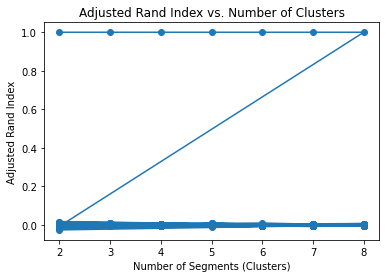

In [20]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_indices = []
adjusted_rand_index_list = []
for result in cluster_results:
    for k, labels in result.items():
        true_labels = cluster_results[0][k]  # Use the first clustering result as true labels for comparison
        adjusted_rand_index = adjusted_rand_score(true_labels, labels)
        adjusted_rand_indices.append((k, adjusted_rand_index))
        adjusted_rand_index_list.append(adjusted_rand_indices)
    
# Separate the results for plotting
num_clusters, aris = zip(*adjusted_rand_indices)

# Create the plot
plt.plot(num_clusters, aris, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Clusters')
plt.show()

In [22]:
cluster_label_of_interest = 3  

# Filter the data points belonging to the cluster of interest
mcdonalds_k4 = X_scaled[np.array(data_predict) == cluster_label_of_interest]
mcdonalds_k4

array([[ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  1.03441123],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       ...,
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  1.03441123],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  0.07156721]])

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mcdonalds_x_standardized = scaler.fit_transform(X_scaled)

MD_k4 = data_predict

mcdonals_k4 = mcdonalds_x_standardized[np.array(MD_k4) == 1]

# Initialize the Gaussian Mixture Model with one component (you can change this as needed)
num_components = 1
gmm_model = GaussianMixture(n_components=num_components, random_state=1234)

# Fit the Gaussian Mixture Model to the data points in cluster 4
gmm_model.fit(mcdonals_k4)

# Get the responsibilities (probabilities of each data point belonging to each component)
responsibilities = gmm_model.predict_proba(mcdonals_k4)


C:\Users\prabh\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
import statsmodels.api as sm

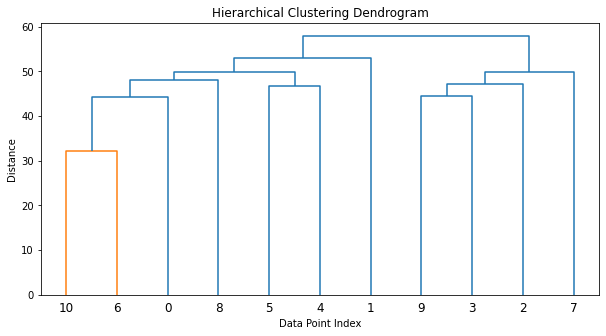

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'mcdonalds.x' is your data.
# Replace this with your actual data.
# Make sure 'mcdonalds.x' is in the shape (n_samples, n_features).

# Calculate the pairwise distances between data points
distances = pdist(np.transpose(X_scaled))

# Perform hierarchical clustering on the distances
linkage_matrix = linkage(distances, method='average')

# Plot the dendrogram to visualize the hierarchical clustering result
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


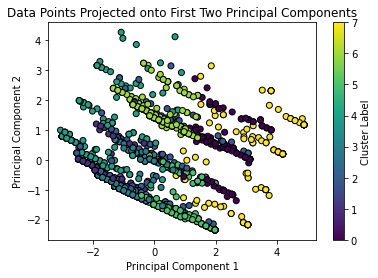

In [26]:

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
MD_pca = pca.fit_transform(X_scaled)


# Create the scatter plot of the data points projected onto the first two principal components
plt.figure()
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points Projected onto First Two Principal Components')
plt.colorbar(label='Cluster Label')
plt.show()


Step 7: Describing Segments

<Figure size 576x432 with 0 Axes>

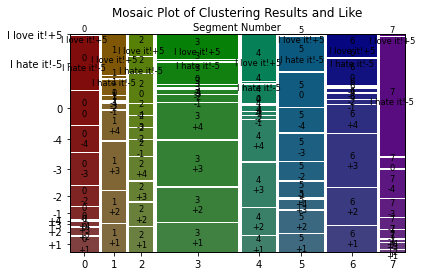

In [27]:
from statsmodels.graphics.mosaicplot import mosaic
cluster_data = pd.DataFrame({'Cluster': MD_k4, 'Like': mcdonalds['Like']})

# Create a two-way contingency table using crosstab
contingency_table = pd.crosstab(cluster_data['Cluster'], cluster_data['Like'])

# Create the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot of Clustering Results and Like')
plt.xlabel('Segment Number')
plt.show()

Step 8: Selecting (the) Target Segment(s)

In [38]:
mcdonalds['k4'] = MD_k4

# Mapping of visit frequencies to numerical values
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 12,
    'Every three months': 4,
    'Once a week': 52,
    'More than once a week': 104,
}

# Convert the 'VisitFrequency' column to numeric based on the mapping
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].map(visit_frequency_mapping)

# Calculate the mean visit frequency for each cluster
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()

print(visit)

k4
0     7.311111
1    24.318182
2    18.086957
3    21.789474
4    23.772152
5     7.763033
6    21.323144
7     3.695652
Name: VisitFrequency, dtype: float64


In [39]:
like = mcdonalds.groupby('k4')['Like.n'].mean()

print(like)

k4
0   -2.340741
1    2.590909
2    0.669565
3    2.331579
4    2.791139
5   -1.511848
6    2.205240
7   -3.739130
Name: Like.n, dtype: float64


In [40]:
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == "Female").mean())

print(female)

k4
0    0.525926
1    0.718182
2    0.460870
3    0.594737
4    0.487342
5    0.587678
6    0.467249
7    0.443478
Name: Gender, dtype: float64


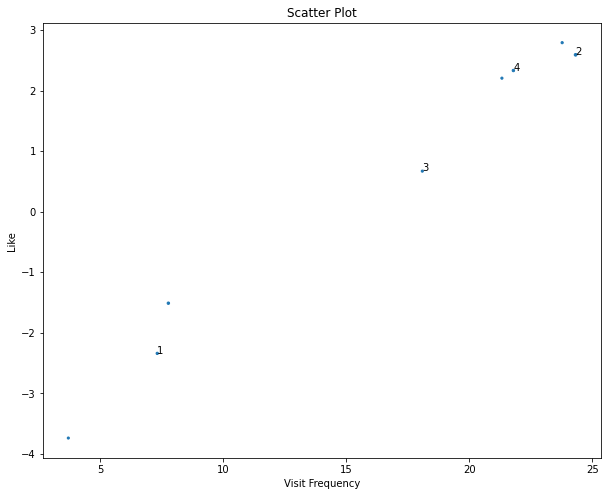

In [49]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(visit, like, s=10 * female)

# Set axis limits
#plt.xlim(2, 4.5)
#plt.ylim(-3, 3)

# Add text labels
for i in range(1, 5):
    plt.text(visit[i-1], like[i-1], str(i))

# Add labels to axes
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot')

# Show the plot
plt.show()


Step 9: Customising the Marketing Mix

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the

food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this

segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more

money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the

MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by

members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same

given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the

queue might be slightly longer in an attempt not to cannibalise the main product line

Step 10: Evaluation and Monitoring

    After the market segmentation analysis is completed, and all strategic and tactical
marketing activities have been undertaken, the success of the market segmentation

strategy has to be evaluated, and the market must be carefully monitored on a
continuous basis. It is possible, for example, that members of segment 3 start earning

more money and the MCSUPERBUDGET line is no longer suitable for them. Changes
can occur within existing market segments. But changes can also occur in the

larger marketplace, for example, if new competitors enter the market. All potential
sources of change have to be monitored in order to detect changes which require

McDonald’s management to adjust their strategic or tactical marketing in view of
new market circumstances